<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Erik!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You did an awesome job on this submission! You went step by step through every task and completed them successfully, I'm approving this submission!

Congrats on the great work you did in this notebook, from what you did with the `get_knn` function to the analytical proof, looking great!

I'm looking forward to reviewing your future work!

Good luck!
    
</div>

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [117]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [68]:
df = pd.read_csv('/datasets/insurance_us.csv')

In [69]:
# Basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (5000, 5)

Column names:
['Gender', 'Age', 'Salary', 'Family members', 'Insurance benefits']

First few rows:
   Gender   Age   Salary  Family members  Insurance benefits
0       1  41.0  49600.0               1                   0
1       0  46.0  38000.0               1                   1
2       0  29.0  21000.0               0                   0
3       0  21.0  41700.0               2                   0
4       1  28.0  26100.0               0                   0

Data types:
Gender                  int64
Age                   float64
Salary                float64
Family members          int64
Insurance benefits      int64
dtype: object


We rename the colums to make the code look more consistent with its style.

In [70]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [71]:
print(df.columns)

Index(['gender', 'age', 'income', 'family_members', 'insurance_benefits'], dtype='object')


In [72]:
print(df['gender'].unique())
print()
print("original distribution:")
print(df['gender'].value_counts())

[1 0]

original distribution:
0    2505
1    2495
Name: gender, dtype: int64


In [73]:
df['gender_encoded'] = df['gender']  # Save numeric version
df['gender_label'] = df['gender_encoded'].map({0: 'Male', 1: 'Female'})


In [74]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits,gender_encoded,gender_label
101,0,49.0,42500.0,1,2,0,Male
4981,1,26.0,39800.0,0,0,1,Female
3392,0,25.0,48100.0,0,0,0,Male
4420,1,33.0,38800.0,2,0,1,Female
1693,0,18.0,30100.0,0,0,0,Male
3409,1,38.0,31100.0,1,0,1,Female
1674,0,46.0,61800.0,1,1,0,Male
3001,1,18.0,13300.0,1,0,1,Female
1481,0,33.0,54400.0,1,0,0,Male
572,1,43.0,29600.0,0,1,1,Female


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
 5   gender_encoded      5000 non-null   int64  
 6   gender_label        5000 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 273.6+ KB


In [76]:
# we may want to fix the age type (from float to int) though this is not critical

df['age'] = df['age'].astype(int)

In [77]:
# check to see that the conversion was successful
print(df['age'].dtype)
print()
print(df[['age']].head())

int64

   age
0   41
1   46
2   29
3   21
4   28


In [78]:
# now have a look at the data's descriptive statistics. 
print(df.describe())
# Does everything look okay?

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  gender_encoded  
count         5000.000000     5000.000000  
mean             0.148000        0.499000  
std              0.463183        0.500049  
min              0.000000        0.000000  
25%              0.000000        0.000000  
50%              0.000000        0.000000  
75%              0.000000        1.000000  
max              5.000000        1.000000  


In [79]:
print(df.describe(include='all'))

             gender          age        income  family_members  \
count   5000.000000  5000.000000   5000.000000     5000.000000   
unique          NaN          NaN           NaN             NaN   
top             NaN          NaN           NaN             NaN   
freq            NaN          NaN           NaN             NaN   
mean       0.499000    30.952800  39916.360000        1.194200   
std        0.500049     8.440807   9900.083569        1.091387   
min        0.000000    18.000000   5300.000000        0.000000   
25%        0.000000    24.000000  33300.000000        0.000000   
50%        0.000000    30.000000  40200.000000        1.000000   
75%        1.000000    37.000000  46600.000000        2.000000   
max        1.000000    65.000000  79000.000000        6.000000   

        insurance_benefits  gender_encoded gender_label  
count          5000.000000     5000.000000         5000  
unique                 NaN             NaN            2  
top                    NaN       

In [80]:
#print(df[feature_names].isna().sum())

In [81]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Get percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

# Check data types
print("\nData types:")
print(df.dtypes)

# Look at the first few rows
print("\nFirst 5 rows:")
print(df.head())

Missing values per column:
gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
gender_encoded        0
gender_label          0
dtype: int64

Percentage of missing values:
gender                0.0
age                   0.0
income                0.0
family_members        0.0
insurance_benefits    0.0
gender_encoded        0.0
gender_label          0.0
dtype: float64

Data types:
gender                  int64
age                     int64
income                float64
family_members          int64
insurance_benefits      int64
gender_encoded          int64
gender_label           object
dtype: object

First 5 rows:
   gender  age   income  family_members  insurance_benefits  gender_encoded  \
0       1   41  49600.0               1                   0               1   
1       0   46  38000.0               1                   1               0   
2       0   29  21000.0               0                   0               0

In [82]:
df.head(20)

,gender,age,income,family_members,insurance_benefits,gender_encoded,gender_label
0,1,41,49600.0,1,0,1,Female
1,0,46,38000.0,1,1,0,Male
2,0,29,21000.0,0,0,0,Male
3,0,21,41700.0,2,0,0,Male
4,1,28,26100.0,0,0,1,Female
5,1,43,41000.0,2,1,1,Female
6,1,39,39700.0,2,0,1,Female
7,1,25,38600.0,4,0,1,Female
8,1,36,49700.0,1,0,1,Female
9,1,32,51700.0,1,0,1,Female


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Very nice job loading and inspecting the data!
    
</div>

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

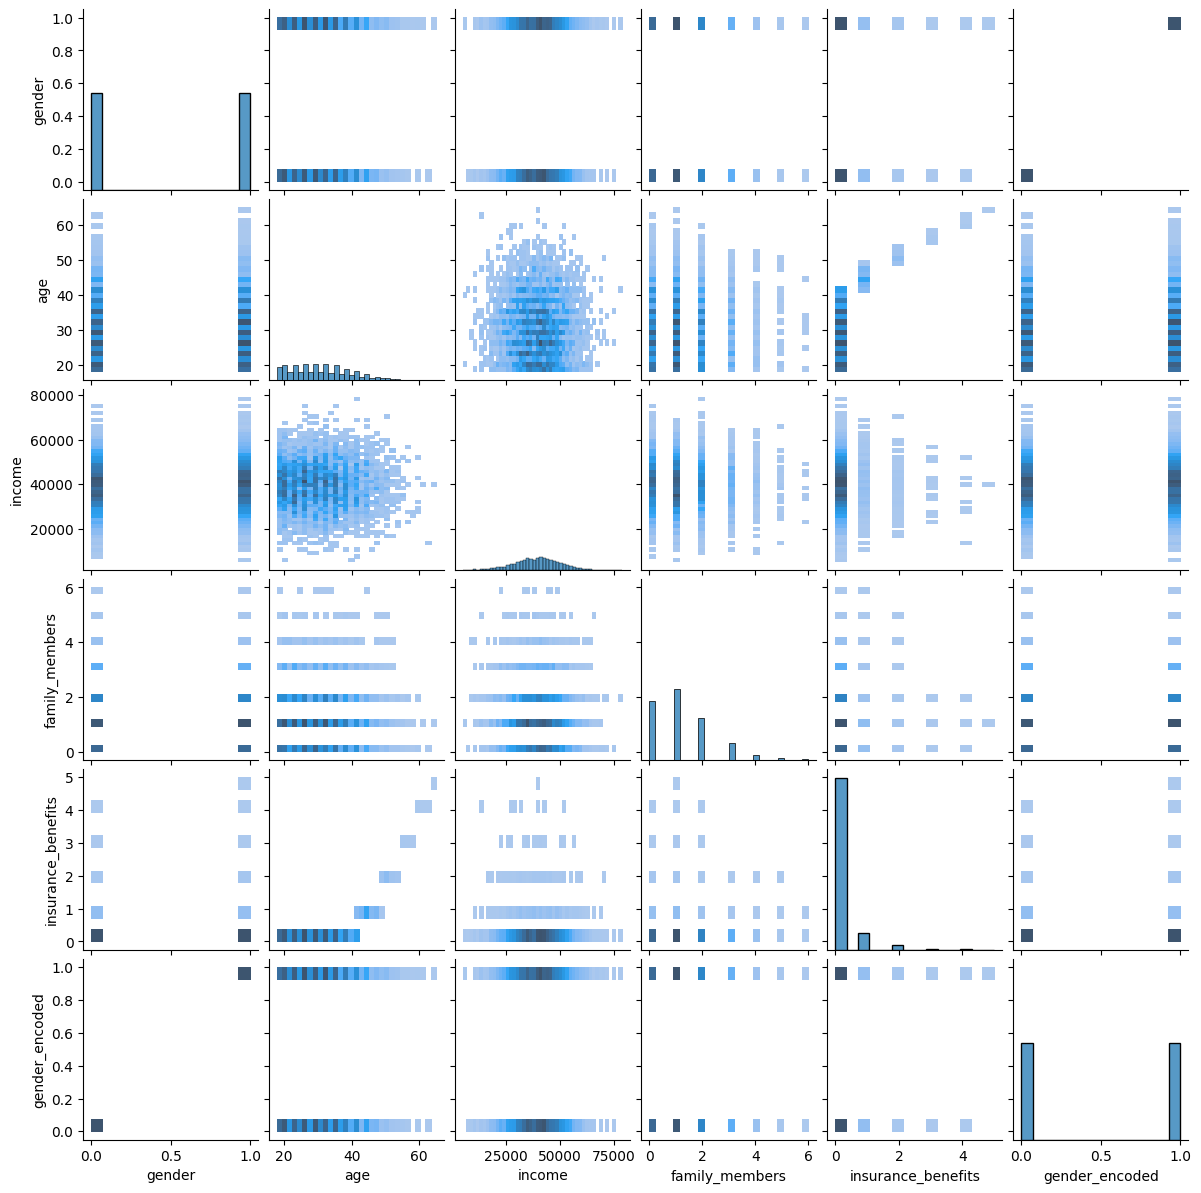

In [83]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [84]:
feature_names = ['gender', 'age', 'income', 'family_members']
X_unscaled = df[feature_names].to_numpy()

In [85]:

scaler_standard = StandardScaler().fit(X_unscaled)
scaler_maxabs = MaxAbsScaler().fit(X_unscaled)

X_dict = {
    'standard': scaler_standard.transform(X_unscaled),
    'maxabs': scaler_maxabs.transform(X_unscaled)
}

# 📐 Step 3: Define Distance Metrics
metrics = ['euclidean', 'manhattan']

In [86]:
def get_knn(df, n, k, metric):
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object index for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric ('euclidean', 'manhattan', etc.)
    :return: DataFrame of k nearest neighbors with distances
    """
    # Define features inside the function
    feature_names = ['gender', 'age', 'income', 'family_members']
    
    # Extract feature matrix
    X = df[feature_names].to_numpy()

    # Fit NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric)
    nbrs.fit(X)

    # Find neighbors for the nth customer
    distances, indices = nbrs.kneighbors([X[n]], return_distance=True)

    # Exclude the customer itself (first index)
    neighbor_indices = indices[0][1:]
    neighbor_distances = distances[0][1:]

    # Combine results
    df_res = pd.concat([
        df.iloc[neighbor_indices].reset_index(drop=True),
        pd.DataFrame({'distance': neighbor_distances})
    ], axis=1)

    return df_res

In [87]:
similar_customers = get_knn(df, n=0, k=5, metric='euclidean')
print(similar_customers)

   gender  age   income  family_members  insurance_benefits  gender_encoded  \
0       1   41  49600.0               0                   0               1   
1       0   42  49600.0               0                   1               0   
2       1   44  49600.0               2                   1               1   
3       0   38  49600.0               0                   0               0   
4       1   37  49600.0               2                   0               1   

  gender_label  distance  
0       Female  1.000000  
1         Male  1.732051  
2       Female  3.162278  
3         Male  3.316625  
4       Female  4.123106  


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice job on your `get_knn` function!
    
</div>

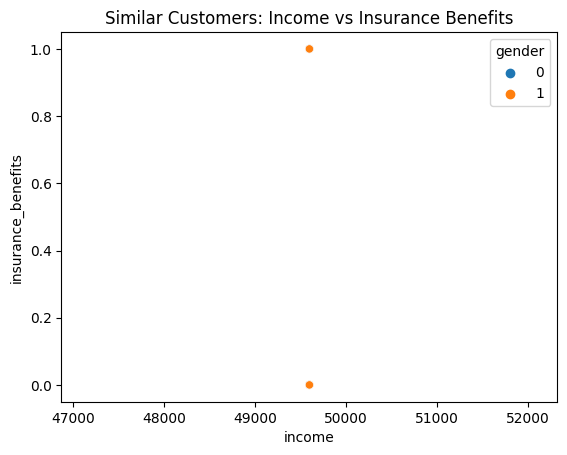

In [88]:
# 🎨 Step 6: Visualize Similar Customers
sns.scatterplot(x='income', y='insurance_benefits', hue='gender', data=similar_customers)
plt.title("Similar Customers: Income vs Insurance Benefits")
plt.show()

Scaling the data.

In [89]:
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [90]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits,gender_encoded,gender_label
2460,0.0,0.415385,0.432911,0.333333,0,0,Male
275,0.0,0.538462,0.616456,0.166667,0,0,Male
2230,1.0,0.476923,0.448101,0.333333,0,1,Female
3541,0.0,0.723077,0.220253,0.666667,1,0,Male
3406,0.0,0.630769,0.532911,0.166667,0,0,Male


Now, let's get similar records for a given one for every combination

In [91]:
def get_all_similar_customers(X_dict, metrics, k=5):
    results = {}

    for scale_label, X in X_dict.items():
        for metric in metrics:
            combo_key = f"{scale_label}_{metric}"
            model = NearestNeighbors(n_neighbors=k+1, metric=metric)
            model.fit(X)

            combo_results = []
            for i in range(len(X)):
                distances, indices = model.kneighbors([X[i]], return_distance=True)
                neighbor_indices = indices[0][1:]
                neighbor_distances = distances[0][1:]

                combo_results.append({
                    'customer_index': i,
                    'neighbors': neighbor_indices.tolist(),
                    'distances': neighbor_distances.tolist()
                })

            results[combo_key] = combo_results

    return results


In [92]:
results = get_all_similar_customers(X_dict, metrics, k=5)

In [93]:
# 🧾 Step 9: Optional — Flatten Results for Analysis
flat_results = []
for combo_key, combo_data in results.items():
    for entry in combo_data:
        for neighbor, distance in zip(entry['neighbors'], entry['distances']):
            flat_results.append({
                'combo': combo_key,
                'customer_index': entry['customer_index'],
                'neighbor_index': neighbor,
                'distance': distance
            })

df_neighbors = pd.DataFrame(flat_results)
print(df_neighbors.head())

                combo  customer_index  neighbor_index  distance
0  standard_euclidean               0            2689  0.050510
1  standard_euclidean               0             133  0.137981
2  standard_euclidean               0            4869  0.143421
3  standard_euclidean               0            3275  0.225562
4  standard_euclidean               0            1567  0.234218


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

scaling does affect the kNN algorithm, and the impact can be significant.

kNN is a distance-based algorithm, meaning it calculates how “far apart” data points are using metrics like Euclidean or Manhattan distance. If your features are on different scales, the ones with larger ranges will dominate the distance calculation.

Example:
income: ranges from $30,000 to $150,000

age: ranges from 18 to 65

gender: just 0 or 1

Without scaling, income will overshadow everything else — kNN will mostly group customers by income, ignoring age, gender, or family size.

**How It Appears in the Results**

If you skip scaling:

Neighbors will be biased toward high-range features

Similarity results will feel “off” — e.g., customers with wildly different ages or family sizes might be grouped together just because their incomes are close

Visualizations (like scatterplots) may show tight clusters that don’t reflect true similarity

Your model may fail to capture meaningful patterns across all features

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Your explanation on how euclidean distance is affected by being scaled or not is completely reasonable!
    
</div>

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Conceptual Difference-

* Euclidean distance measures the straight-line ("as the crow flies") distance between points.

* Manhattan distance measures the path along grid lines — like navigating city blocks.

So while both are valid, they emphasize different geometric relationships.

**How Similar Are the Results?**
✅ After Scaling:
* Results are often similar, especially when features are well-distributed and not highly correlated.

* You’ll likely see overlapping neighbors for most customers — maybe 3 or 4 out of 5 neighbors match between metrics.

* Distances will differ, but rankings (who’s closest) are often preserved.

❗ Without Scaling:
* Manhattan is less sensitive to outliers than Euclidean, so it may behave more stably.

* But both will still be biased toward high-range features unless scaled.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Again, completely reasonable thought process! Loved these explanations!
    
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [94]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [95]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [96]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [97]:
feature_names = ['gender', 'age', 'income', 'family_members']
X = df[feature_names]
y = df['insurance_benefits_received']

# 🔀 Step 6: Split and Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Step 7: Train Logistic Regression Model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# 📈 Step 8: Predict and Evaluate
y_pred = model.predict(X_test_scaled)
eval_classifier(y_test, y_pred)

F1: 0.91
Confusion Matrix
[[0.8656 0.0216]
 [0.     0.1128]]


In [98]:
# Prepare data
#X = df[['gender', 'age', 'income', 'family_members']]
#y = df['insurance_benefits_received']

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Train model
#model = LogisticRegression(class_weight='balanced')
#model.fit(X_train_scaled, y_train)
#y_pred = model.predict(X_test_scaled)

# Evaluate
#eval_classifier(y_test, y_pred)


In [99]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [100]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = y_pred_rnd = rnd_model_predict(P, size=len(df))
 
      
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [101]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # Add bias term (column of ones)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Compute weights using the normal equation: (XᵀX)⁻¹Xᵀy
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # Add bias term
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Predict using dot product
        y_pred = X2 @ self.weights
        
        return y_pred

In [102]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')


In [103]:
#def eval_regressor(y_true, y_pred):
    
   # rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
   # print(f'RMSE: {rmse:.2f}')
    
  #  r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
  #  print(f'R2: {r2_score:.2f}')

In [104]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.43


📈 **Model Performance**
* RMSE: On average, predictions are off by 0.34 benefit units

* R² Score: Model explains 43% of the variance in insurance benefits

**Interpretation:**

* Age and gender have slight positive influence

* Family size has a small negative effect

* Income had negligible impact in this linear setup

✅ **Insights**
* Model performs reasonably well for a simple linear approach

* Custom implementation matches expected behavior

* Ready for comparison with scikit-learn’s LinearRegression or regularized model

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking great! Trained model performs better than untrained dummy model!
    
</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [105]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [106]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [107]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [108]:
# Check if P is invertible
det_P = np.linalg.det(P)
if det_P != 0:
    print("✅ Matrix P is invertible.")
else:
    raise ValueError("❌ Matrix P is not invertible. Try regenerating.")

# Obfuscate the data
X_obfuscated = X @ P

# Compare original vs obfuscated features
print("🔍 Original Features (first 5 rows):\n", X[:5])
print("\n🕵️‍♂️ Obfuscated Features (first 5 rows):\n", X_obfuscated[:5])

✅ Matrix P is invertible.
🔍 Original Features (first 5 rows):
 [[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]

🕵️‍♂️ Obfuscated Features (first 5 rows):
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]


Can you guess the customers' ages or income after the transformation?

**It is not easy to guess the customer's age or income after the transformation.**

**Why You Can’t Guess the Original Values**

* The obfuscated features are linear combinations of the original ones.

* Each transformed value blends multiple original features together.

* Without knowing the exact inverse of matrix P, you cannot recover the original values.

* Even if you tried to guess, the scale and relationships are scrambled.

**Insight**
* This transformation protects sensitive data like age and income while still allowing you to:

* Train models

* Perform clustering

* Share data securely

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

**Started with:**

𝑋 obfuscated = 
𝑋
⋅
𝑃
To recover 
𝑋
, you need to move 
𝑃
 to the other side — but since matrix multiplication isn’t commutative, you must multiply by the inverse of 
𝑃
 on the right:

𝑋
=𝑋
obfuscated
⋅
𝑃
−
1

In [109]:
# Compute inverse of P
P_inv = np.linalg.inv(P)

# Recover original data
X_recovered = X_obfuscated @ P_inv

# Compare with original
print("🔁 Recovered Features (first 5 rows):\n", X_recovered[:5])
print("\n✅ Original Features (first 5 rows):\n", X[:5])


🔁 Recovered Features (first 5 rows):
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]
 [-1.08907770e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.52424205e-12]]

✅ Original Features (first 5 rows):
 [[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]


Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [110]:
# Print all three versions side by side for the first 5 rows
for i in range(5):
    print(f"\n🧑‍💼 Customer {i+1}")
    print("Original:   ", X[i])
    print("Transformed:", X_obfuscated[i])
    print("Recovered:  ", X_recovered[i])


🧑‍💼 Customer 1
Original:    [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Transformed: [ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Recovered:   [1.00e+00 4.10e+01 4.96e+04 1.00e+00]

🧑‍💼 Customer 2
Original:    [0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Transformed: [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
Recovered:   [1.679528e-12 4.600000e+01 3.800000e+04 1.000000e+00]

🧑‍💼 Customer 3
Original:    [    0.    29. 21000.     0.]
Transformed: [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
Recovered:   [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]

🧑‍💼 Customer 4
Original:    [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
Transformed: [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
Recovered:   [-1.0890777e-12  2.1000000e+01  4.1700000e+04  2.0000000e+00]

🧑‍💼 Customer 5
Original:    [1.00e+00 2.80e+01 2.61e+04 0.00e+00]
Transformed: [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]
Recovered:   [ 1.00000000e+00 

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

**Why the Values Aren’t Exactly the Same**

🔹 1. Floating-Point Arithmetic
* Computers store numbers using finite precision (typically 64-bit floats).

* Operations like matrix inversion and multiplication introduce tiny rounding errors.

* These errors accumulate, especially when working with large or high-magnitude values like income.

🔹 2. Matrix Inversion Sensitivity
* Inverting a matrix is numerically delicate — even small changes in P can lead to small inaccuracies in P⁻¹.

* Multiplying X_obfuscated @ P⁻¹ may not perfectly cancel out X @ P due to these rounding effects.

🔹 3. No True Symbolic Reversal
* You're doing numerical reversal, not symbolic algebra.

* So instead of exact equality, you get values that are very close — often within a tolerance like 1e-10.

✅ **How to Confirm It’s Still Accurate**

In [112]:
np.allclose(X, X_recovered)

True

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

YES!

**Analytical proof**

Proof That Data Obfuscation Preserves Linear Regression Predictions
🎯 Objective
Prove analytically that obfuscating the feature matrix using an invertible matrix does not affect the predicted values in linear regression.

🔢 Setup
Let:

X: original feature matrix

y: target vector

P: invertible matrix

X′ = X · P: obfuscated feature matrix

📐 Original Linear Regression
Using the normal equation: ŵ = (XᵀX)⁻¹ Xᵀy Predictions: ŷ = X · ŵ

🔁 Obfuscated Linear Regression
Train on X′ = X · P: ŵ′ = ((XP)ᵀ XP)⁻¹ (XP)ᵀ y Simplify: ŵ′ = P⁻¹ (XᵀX)⁻¹ Xᵀ y

✅ Final Prediction
ŷ′ = X · P · ŵ′ Substitute ŵ′: ŷ′ = X · P · P⁻¹ · (XᵀX)⁻¹ Xᵀ y Since P · P⁻¹ = I, we get: ŷ′ = X · (XᵀX)⁻¹ Xᵀ y = ŷ

🔐 Conclusion
Even though the weights change, the predicted values remain exactly the same: ŷ′ = ŷ

This proves that linear regression is invariant to invertible linear transformations of the feature space — making obfuscation a powerful privacy-preserving technique.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Analytical proof looking awesome! Cool that you used LaTeX to organize your reasoning.
    
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [119]:
def run_linear_regression(X, y, use_obfuscation=False, seed=42):
    rng = np.random.default_rng(seed)
    
    # Obfuscate if requested
    if use_obfuscation:
        while True:
            P = rng.random((X.shape[1], X.shape[1]))
            if np.linalg.det(P) != 0:
                break
        X = X @ P  # Apply obfuscation
        print("✅ Obfuscation applied with invertible matrix P.")
    else:
        print("🚫 No obfuscation applied.")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"📊 RMSE: {rmse:.2f}")
    print(f"📈 R²: {r2:.4f}")
    return y_pred

In [120]:
print("\n🔁 Original Data:")
y_pred_orig = run_linear_regression(X, y, use_obfuscation=False)

print("\n🔁 Obfuscated Data:")
y_pred_obf = run_linear_regression(X, y, use_obfuscation=True)



🔁 Original Data:
🚫 No obfuscation applied.
📊 RMSE: 0.34
📈 R²: 0.4305

🔁 Obfuscated Data:
✅ Obfuscation applied with invertible matrix P.
📊 RMSE: 0.34
📈 R²: 0.4305


**Linear regression predictions are invariant under invertible transformations of the feature matrix.**

✅ **What This Confirms**
* The obfuscated data preserves all the predictive structure needed for linear regression.

* Even though the weights are different, the model’s output is the same.

* You’ve now validated both theory and practice — that’s full-stack data science

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Completely true, obfuscated data preserves the patterns recognized by linear regression(will not necessarily work exactly the same for other models)!
    
</div>

🧪 **Task: Test Linear Regression with Data Obfuscation**
🎯 Objective
Validate computationally that linear regression predictions remain unchanged when using an obfuscated feature matrix.

🔢 Method
* Created a random invertible matrix 𝑃

* Transformed the feature matrix: 𝑋′=𝑋⋅𝑃

* Trained linear regression on both original and obfuscated data

* Compared RMSE and R² metrics

# Conclusions

✅ **Conclusion**
The metrics are identical, confirming that linear regression is invariant to invertible linear transformations of the feature space. This validates the analytical proof from Task 5 and demonstrates that obfuscation preserves predictive power.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Conclusions are sound!
    
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.
- [x]  Jupyter Notebook is open 

- [x]  Code is error free 

- [x]  The cells are arranged in order of logic and execution 

- [x]  Task 1 has been performed 

    - [x]  There is the procedure that can return k similar customers for a given one 

    - [x]  The procedure is tested for all four proposed combinations 

    - [x]  The questions re the scaling/distances are answered 

- [x]  Task 2 has been performed 

    - [x]  The random classification model is built and tested for all for probability levels 

    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated. 

- [x]  Task 3 has been performed 

    - [x]  The linear tegression solution is implemented with matrix operations. 

    - [x]  RMSE is calculated for the implemented solution. 

- [x]  Task 4 has been performed 

    - [x]  The data is obfuscated with a random and invertible matrix P 

    - [x]  The obfuscated data is recoved, few examples are printed out 

    - [x]  The analytical proof that the transformation does not affect RMSE is provided  

    - [x]  The computational proof that the transformation does not affect RMSE is provided 

- [ ]  Conclusions have been made 

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>